In [ ]:
import numpy as np
import pandas as pd
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from folium.plugins import HeatMap

In [ ]:
data=pd.read_csv('/content/delhi_dataSet.csv')

In [ ]:
data

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN
...,...,...,...,...,...
180,180,West Delhi,Tihar Village,NaN,NaN
181,181,West Delhi,Tilak Nagar,28.639650,77.094039
182,182,West Delhi,Uttam Nagar,NaN,NaN
183,183,West Delhi,Vikas Nagar,28.644009,77.054470


In [ ]:
data.describe()

,Unnamed: 0,latitude,longitude
count,185.000000,163.000000,163.000000
mean,92.000000,29.253671,66.929529
std,53.549043,2.508360,40.310497
min,0.000000,28.433762,-90.261223
25%,46.000000,28.564461,77.144763
50%,92.000000,28.629489,77.206707
75%,138.000000,28.671847,77.245291
max,184.000000,39.031714,77.322064


In [ ]:
data.isna().sum()

Unnamed: 0       0
Borough          0
Neighborhood     0
latitude        22
longitude       22
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Dhaka,39.031714,-90.261223


In [ ]:
latitude = 28.6141793
longitude = 77.2022662

In [ ]:
delhiData=data
map_delhi=folium.Map(location=[latitude,longitude],zoom_start=11)
for lat, lng, label in zip(delhiData['latitude'], delhiData['longitude'],delhiData['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)
map_delhi

In [ ]:
delhi_loc=pd.read_csv('/content/restaurant_dataSet.csv')

In [ ]:
delhi_loc

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Adarsh Nagar,28.614193,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,1,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,2,Adarsh Nagar,28.614193,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,3,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant
...,...,...,...,...,...,...,...,...
844,844,Tilak Nagar,28.639650,77.094039,CCD tilak nagar,28.636264,77.097048,Café
845,845,Vikaspuri,28.638419,77.070836,Domino's Pizza,28.638000,77.075000,Pizza Place
846,846,Vikaspuri,28.638419,77.070836,McDonald's,28.639752,77.075190,Fast Food Restaurant
847,847,Vikaspuri,28.638419,77.070836,Asian Garden,28.639661,77.074482,Indian Restaurant


In [ ]:
map_res = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(delhi_loc['Venue Latitude'], delhi_loc['Venue Longitude'], delhi_loc['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res)
map_res

In [ ]:
delhi_onehot=pd.get_dummies(delhi_loc[['Venue Category']],prefix="",prefix_sep="")
delhi_onehot['Neighborhood']=delhi_loc['Neighborhood']
fixed_columns=[delhi_onehot.columns[-1]]+list(delhi_onehot.columns[:-1])
delhi_onehot=delhi_onehot[fixed_columns]
delhi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Adarsh Nagar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Adarsh Nagar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Adarsh Nagar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Ashok Vihar,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
delhi_onehot.shape

(849, 75)

In [ ]:
delhi_grouped=delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.00,0.0,0.0,0.0,0.222222,0.0,0.00,...,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.25,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Azadpur,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1,indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_venues=pd.DataFrame(columns=columns)
neighborhoods_venues['Neighborhood'] = delhi_grouped['Neighborhood']
for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :],num_top_venues)
neighborhoods_venues.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Indian Restaurant,Pizza Place,Mexican Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
1,Alaknanda,Indian Restaurant,BBQ Joint,Pizza Place,Middle Eastern Restaurant,New American Restaurant,Restaurant,Steakhouse,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant
2,Anand Vihar,Indian Restaurant,Soup Place,Indian Sweet Shop,Pizza Place,Punjabi Restaurant,Mexican Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant
3,Ashok Vihar,Indian Restaurant,Diner,Bakery,Afghan Restaurant,Middle Eastern Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant
4,Azadpur,Argentinian Restaurant,Indian Restaurant,Café,Restaurant,Afghan Restaurant,Middle Eastern Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant


In [ ]:
clusters = 5
delhi_grouped_clustering=delhi_grouped.drop('Neighborhood',axis=1)
kmeans =KMeans(n_clusters=clusters,random_state=0).fit(delhi_grouped_clustering)
kmeans.labels_[0:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 3, 2, 3, 1, 3, 3, 3, 0], dtype=int32)

In [ ]:
neighborhoods_venues.insert(0,'Cluster Labels',kmeans.labels_)
delhi_merged = delhiData
delhi_merged = delhi_merged.join(neighborhoods_venues.set_index('Neighborhood'),on='Neighborhood')
delhi_merged.dropna(inplace=True)
delhi_merged.head()

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,0.0,Fast Food Restaurant,Indian Restaurant,Pizza Place,Mexican Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
1,North West Delhi,Ashok Vihar,28.699453,77.184826,2.0,Indian Restaurant,Diner,Bakery,Afghan Restaurant,Middle Eastern Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant
2,North West Delhi,Azadpur,28.707657,77.175547,3.0,Argentinian Restaurant,Indian Restaurant,Café,Restaurant,Afghan Restaurant,Middle Eastern Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant
7,North West Delhi,Keshav Puram,28.688926,77.161683,3.0,Indian Restaurant,Gastropub,Café,Food Truck,Bakery,Middle Eastern Restaurant,New American Restaurant,Multicuisine Indian Restaurant,Mughlai Restaurant,Molecular Gastronomy Restaurant
9,North West Delhi,Kohat Enclave,28.698041,77.140539,2.0,Indian Restaurant,Food Court,Bakery,Food,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Irani Cafe,Indian Sweet Shop,Northeast Indian Restaurant


In [ ]:
clusterdata=pd.merge(delhi_onehot.groupby('Neighborhood').sum(),delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata=clusterdata.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<ipython-input-117-4132971b94b6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


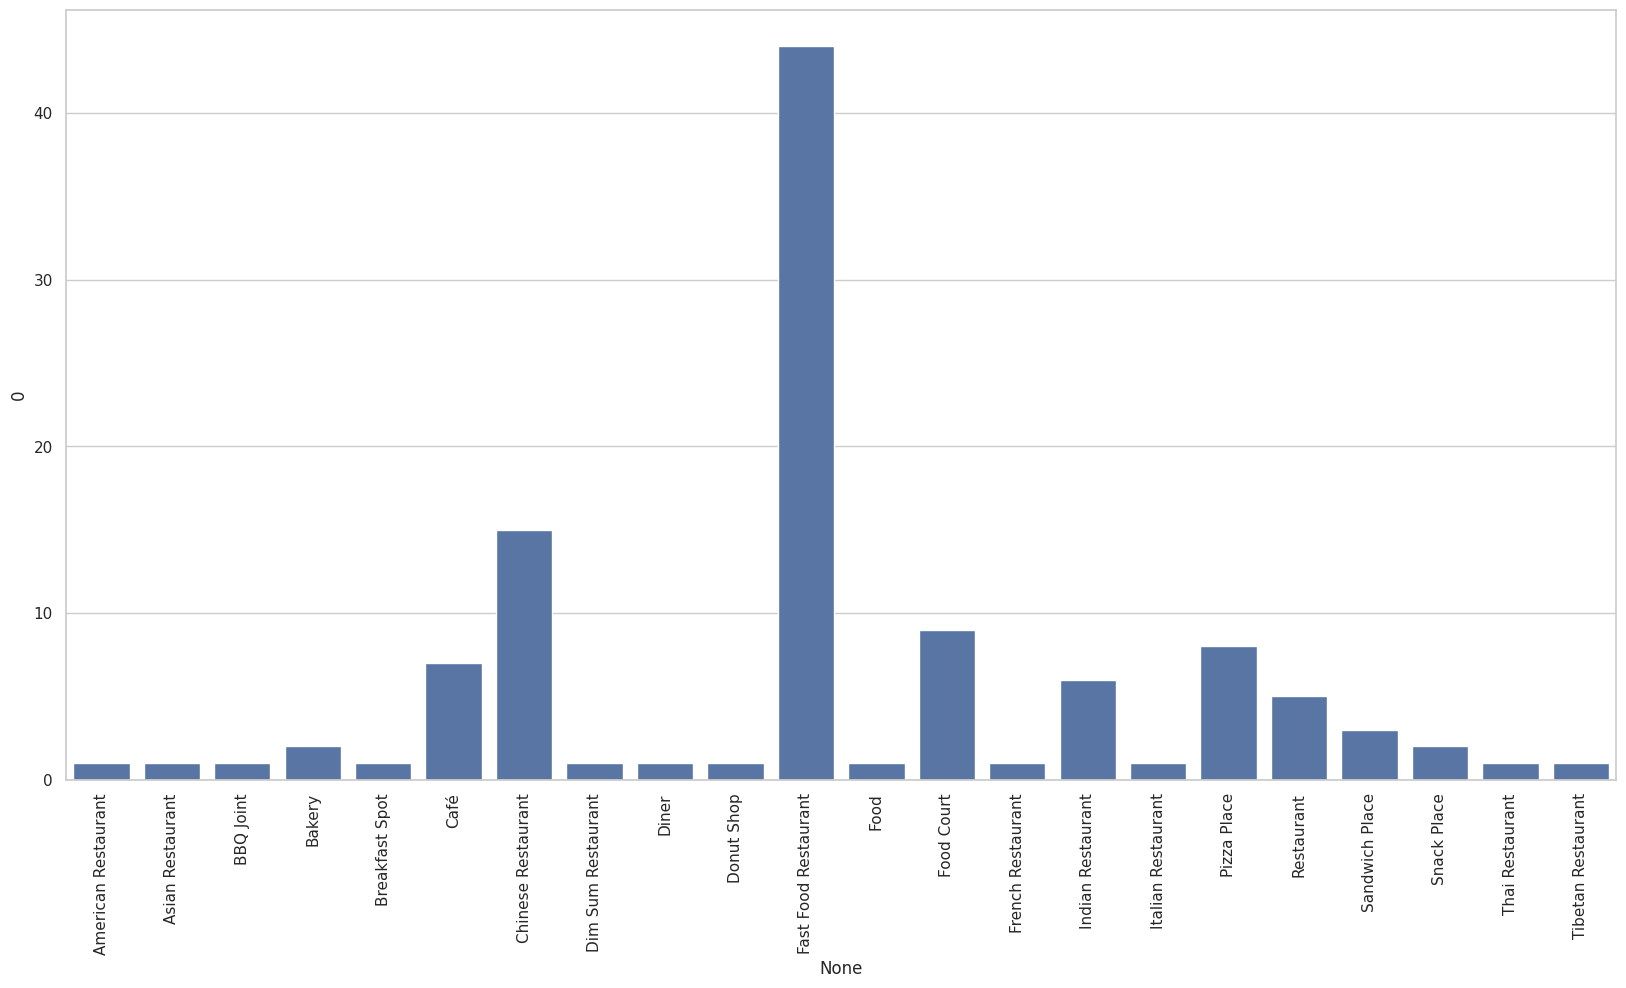

In [ ]:
plot_bar(0)

In [ ]:
delhi_loc.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
forheatmap=delhi_loc.copy()
forheatmap=pd.merge(forheatmap,delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
forheatmap.drop(forheatmap[~forheatmap['Cluster Labels'].isin([1,2])].index, inplace=True)
forheatmap.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,2.0
5,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,2.0
6,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,2.0
7,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,2.0
17,Kohat Enclave,28.698041,77.140539,Peshawari,28.699012,77.139020,Indian Restaurant,2.0


In [ ]:
res_heat = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forheatmap['Venue Latitude'],forheatmap['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat)
for lat, lng, label in zip(forheatmap['Neighborhood Latitude'], forheatmap['Neighborhood Longitude'], forheatmap['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat)
res_heat

In [ ]:
count_all = forheatmap[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.6*len(count_all))
print(count_all.iloc[target_count])
count_all.drop(count_all[count_all.Venue.values>7].index,inplace=True)
count_all.columns=['all count']
count_all.head()

Venue    4
Name: Jasola, dtype: int64


,all count
Neighborhood,
Vivek Vihar,1
Roshanara Bagh,1
Rithala,1
Pratap Nagar,1
Pragati Maidan,1


In [ ]:
count_ind=forheatmap[forheatmap['Venue Category']=="Indian Restaurant"][['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count=int(0.3*len(count_ind))
print(count_ind.iloc[target_count])
count_ind.drop(count_ind[count_ind.Venue.values>1].index,inplace=True)
count_ind.columns=['ind count']
count_ind.head()

Venue    2
Name: Pandav Nagar, dtype: int64


,ind count
Neighborhood,
Vivek Vihar,1
Bali Nagar,1
Roshanara Bagh,1
Pragati Maidan,1
Ghitorni,1


In [ ]:
lowdensity=count_all.join(count_ind)
lowdensity.index.values

array(['Vivek Vihar', 'Roshanara Bagh', 'Rithala', 'Pratap Nagar',
       'Pragati Maidan', 'Geeta Colony', 'Inderpuri',
       'New Friends Colony', 'Ghitorni', 'Khanpur', 'Pandav Nagar',
       'Jhilmil Colony', 'Naraina', 'Pitam Pura', 'Rangpuri', 'Mehrauli',
       'Meera Bagh', 'Ashok Vihar', 'Vikaspuri', 'Jhandewalan', 'Jasola',
       'Gulmohar Park', 'Daryaganj', 'Bali Nagar', 'Lahori Gate',
       'Munirka', 'Patparganj', 'Dilshad Garden', 'Chawri Bazaar',
       'Mahipalpur'], dtype=object)

In [ ]:
temp_recommend=delhiData.copy()
temp_recommend.drop(temp_recommend[~temp_recommend['Neighborhood'].isin(lowdensity.index.values)].index, inplace=True)
temp_recommend.head()

,Borough,Neighborhood,latitude,longitude
1,North West Delhi,Ashok Vihar,28.699453,77.184826
12,North West Delhi,Pitam Pura,28.703268,77.132250
14,North West Delhi,Rithala,28.720806,77.107181
19,North Delhi,Chawri Bazaar,28.649927,77.229788
25,North Delhi,Lahori Gate,28.656841,77.218534


In [ ]:
top_nei=delhi_loc[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(3).index.values
top_nei

array(['Connaught Place', 'Khirki Village', 'Hauz Khas Village'],
      dtype=object)

In [ ]:
toplatlng=delhiData[['Neighborhood','latitude','longitude']][delhiData['Neighborhood'].isin(top_nei)].reset_index()
toplatlng

,index,Neighborhood,latitude,longitude
0,58,Connaught Place,28.631383,77.219792
1,95,Hauz Khas Village,28.553855,77.194713
2,103,Khirki Village,28.529885,77.218077


In [ ]:
temp_recommend.reset_index(inplace=True)
temp_recommend.drop(columns=['index','Borough'], inplace=True)
temp_recommend.head()

,Neighborhood,latitude,longitude
0,Ashok Vihar,28.699453,77.184826
1,Pitam Pura,28.703268,77.132250
2,Rithala,28.720806,77.107181
3,Chawri Bazaar,28.649927,77.229788
4,Lahori Gate,28.656841,77.218534
